# K-means for Image Processing

One cool application for K-means(other than the obvious use in clustering data points) is to process images. The first technique we'll explore is image segmentation, where the K-means algorithm will give us however many centers we want and we'll set image pixel values equal to their respective means. 

In [25]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

It makes sense to start by copying our already written K-means implementation from the other notebook.

In [78]:
def calcerror(data, rnk, centers):
    err = 0.0
    for i in np.arange(len(centers)):
        err = err + np.sum((np.linalg.norm(data[np.where(rnk==i)[0], :] - centers[i], axis=1))**2, axis=0)
    return err

def kmeans(data, k):
    num = 5  
    error = -1
    fincenters = None
    finrnk = None
    
    # run 5 models and only update the final centers and labels if the error is lower than the previous
    for l in np.arange(num):
        # step 1
        centers = data[random.sample(range(data.shape[0]), k), :]
        newcenters = np.zeros(centers.shape)
        abort = 0    
        # cap the algorithm at 10 iterations, any more and it will just use up computational time
        for j in np.arange(10):
            # step 2
            temp = np.empty([len(centers), len(data)])
            for i in np.arange(len(centers)):
                temp[i] = (np.linalg.norm(data - centers[i], axis=1))**2
            dist = pd.DataFrame(temp.T)
            rnk = np.array([dist.idxmin(axis=1)]).T

            if(abort):
                break
            # step 3
            for i in np.arange(len(centers)):
                newcenters[i] = np.sum(data[np.where(rnk==i)[0], :], axis=0) / len(np.where(rnk==i)[0])

            if(np.array_equal(centers, newcenters)):
                abort = 1
            centers = newcenters
            
        if(error == -1):
            error = calcerror(data, rnk, centers)
            fincenters = centers
            finrnk = rnk
        elif(error > calcerror(data, rnk, centers)):
            fincenters = centers
            finrnk = rnk
            error = calcerror(data, rnk, centers)
            
    return(fincenters, finrnk)

We can now load our image and format the pixel values. For the sake of simplicity(and to not bite off more than we can chew), let's start with a black and white image before moving onto color images.

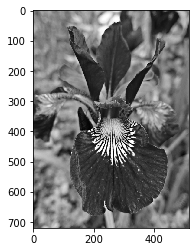

In [114]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

image = rgb2gray(plt.imread('iris.png'))
plt.imshow(image, cmap='gray')

As briefly mentioned previously, we want to first compute the cluster centers using K-means and then assign pixel values to their respective means. As for dealing with the image data, we first flatten the matrix we get from imread to get a vector of pixel values. After processing we have to reconstruct the image matrix before outputting it.

In [138]:
def imgseg(img, k):
    col = img.shape[0]
    row = img.shape[1]

    flatimage = np.reshape(img, (-1,1))
    centers, labels = kmeans(flatimage, k)

    temp = pd.DataFrame(np.hstack((flatimage, labels)), columns=['img', 'label'])
    for i in np.arange(len(np.unique(labels))):
        temp['img'].loc[temp['label'] == i] = float(centers[i])

    newimg = np.array(temp['img'])

    fig, ax = plt.subplots(1, 2, figsize=(10,8))
    ax[0].imshow(img, cmap='gray')
    ax[1].imshow(np.reshape(newimg, (col, -1)), cmap='gray')

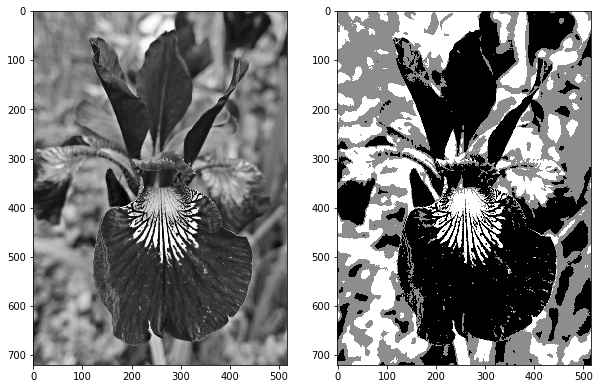

In [139]:
imgseg(rgb2gray(plt.imread('iris.png')), 3)

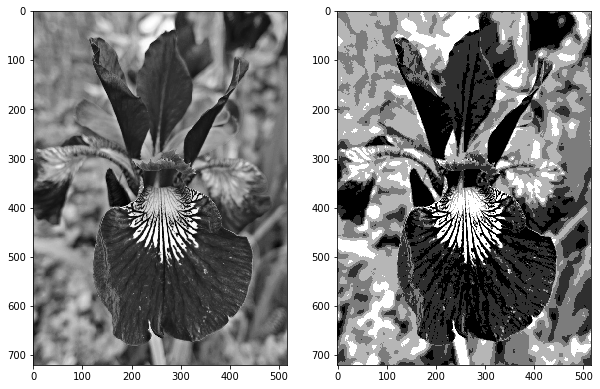

In [107]:
imgseg(rgb2gray(plt.imread('iris.png')), 5)

As expected, the more clusters there are the more complex the processed image looks. 

In [108]:
img2 = plt.imread('iris.png')

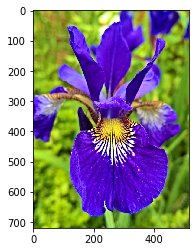

In [129]:
plt.imshow(img2)

In [141]:
c = img2[:, :, 0], img2[:, :, 1], img2[:, :, 2], img2[:, :, 3]

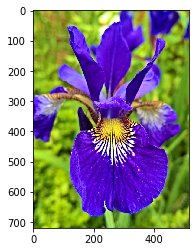

In [146]:
test = np.zeros(img2.shape)
for i in np.arange(4):
    test[:, :, i] = c[i]
plt.imshow(test)

In [151]:
def rgbaimgseg(img, k):
    newimg = np.zeros(img.shape)
    c = img[:, :, 0], img[:, :, 1], img[:, :, 2], img[:, :, 3]
    col = c[0].shape[0]
    row = c[0].shape[1]

    for i in np.arange(3):
        flat = np.reshape(c[i], (-1,1))
        centers, labels = kmeans(flatimage, k)

        temp = pd.DataFrame(np.hstack((flatimage, labels)), columns=['img', 'label'])
        for i in np.arange(len(np.unique(labels))):
            temp['img'].loc[temp['label'] == i] = float(centers[i])

        new = np.reshape(np.array(temp['img']), (col, -1))
        newimg[:, :, i] = new
    newimg[:, :, 3] = c[3]
    fig, ax = plt.subplots(1, 2, figsize=(10,8))
    ax[0].imshow(img)
    ax[1].imshow(newimg)

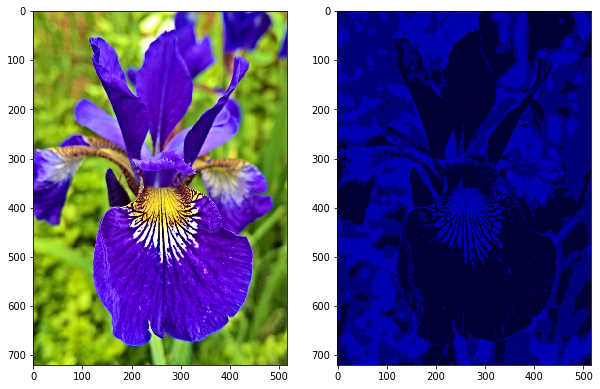

In [152]:
rgbaimgseg(plt.imread('iris.png'), 3)

In [153]:
rgbaimgseg(plt.imread('iris.png'), 7)

IndexError: index 6 is out of bounds for axis 2 with size 4